<a href="https://colab.research.google.com/github/zidanfadl/Bike-Share-Analysis/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Zidan Fadlurorhman
- **Email:** fadlurrohman.zidan@gmail.com
- **ID Dicoding:** zidan_fad

## Menentukan Pertanyaan Bisnis



1. How does the bike rentals growth over time?
2. How does weather condition influence bike rentals in Q1 of 2011?
3. How the workday influence the bike rental in week?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats
import seaborn as sns


## Data Wrangling

### Gathering Data

In [ ]:
!cd /content
!mkdir -p 'Bike_Dataset'

In [ ]:
#use gdown to download the zip file
!pip install gdown
!gdown --id 1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ -O '/content/Bike_Dataset/bike-share-dataset.zip'

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ
To: /content/Bike_Dataset/bike-share-dataset.zip
100% 280k/280k [00:00<00:00, 74.9MB/s]


In [ ]:
!file /content/Bike_Dataset/bike-share-dataset.zip

/content/Bike_Dataset/bike-share-dataset.zip: Zip archive data, at least v2.0 to extract, compression method=deflate


In [ ]:
import zipfile
# Unzip the file
with zipfile.ZipFile('/content/Bike_Dataset/bike-share-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/Bike_Dataset')
!ls /content/Bike_Dataset

bike-share-dataset.zip	day.csv  hour.csv  Readme.txt


In [ ]:
#Day Dataset
day_df = pd.read_csv('/content/Bike_Dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
#Hour Dataset
hour_df = pd.read_csv('/content/Bike_Dataset/hour.csv')
hour_df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [ ]:
#Assessing "Day" Dataset
day_df.info()
print("\nJumlah duplikasi: {}\n\nMissing value:\n{}".format(day_df.duplicated().sum(), day_df.isna().sum()))
day_max_values = day_df.max()
print(f"\nMax value:\n{day_max_values}\n")
day_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Jumlah duplikasi: 0

Missing value:
instant       0
dteday        0
season        0
yr      

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
#Assessing "Hour" Dataset
hour_df.info()
print("\nJumlah duplikasi: {}\n\nMissing value:\n{}".format(hour_df.duplicated().sum(), hour_df.isna().sum()))
hour_max_values = hour_df.max()
print(f"\nMax value:\n{hour_max_values}\n")
hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

Jumlah duplikasi: 0

Missing value:
instant     

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [ ]:
#checking unnecessary feature
unique_col_day = [column for column in day_df.columns if day_df[column].nunique() == len(day_df)]
unique_col_hour = [column for column in hour_df.columns if hour_df[column].nunique() == len(hour_df)]
print(f"Unnecessary feature:\nDay dataframe:{unique_col_day}\nHour Dataframe:{unique_col_hour}")

Unnecessary feature:
Day dataframe:['instant', 'dteday']
Hour Dataframe:['instant']


In [ ]:
#Drop unnecessary feature from each dataframe and change dteday data type from object into datetime
day = day_df.drop(['instant', 'dteday'],axis=1)
hour = hour_df.drop(['instant'],axis=1)
hour["dteday"] = pd.to_datetime(hour["dteday"])

In [ ]:
#Categorical Variable
#Day Dataframe
day['season'] = day.season.astype('category')
day['holiday'] = day.holiday.astype('category')
day['weekday'] = day.weekday.astype('category')
day['weathersit'] = day.weathersit.astype('category')
day['workingday'] = day.workingday.astype('category')
day['mnth'] = day.mnth.astype('category')

#Hour Dataframe
hour['season'] = hour.season.astype('category')
hour['holiday'] = hour.holiday.astype('category')
hour['weekday'] = hour.weekday.astype('category')
hour['weathersit'] = hour.weathersit.astype('category')
hour['workingday'] = hour.workingday.astype('category')
hour['mnth'] = hour.mnth.astype('category')

In [ ]:
#Mapping each variable in feature season, weekday and mnth into its name
def replace_values(df, replacements):
    for column, mapping in replacements.items():
        if column in df.columns:
            df[column] = df[column].replace(mapping)
    return df

replacements = {
    'season': {1:"springer", 2:"summer", 3:"fall", 4:"winter"},
    'weathersit': {1:'good', 2:'moderate', 3:'bad', 4:'severe'},
    'mnth': {1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sept', 10:'oct', 11:'nov', 12:'dec'},
    'weekday': {0:'sun', 1:'mon', 2: 'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'}
}

hour = replace_values(hour, replacements)
day = replace_values(day, replacements)
hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,springer,0,jan,0,0,sat,0,good,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,springer,0,jan,1,0,sat,0,good,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,springer,0,jan,2,0,sat,0,good,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,springer,0,jan,3,0,sat,0,good,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,springer,0,jan,4,0,sat,0,good,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
print("Day Dataframe Info:")
day.info()
print("\n\nHour Dataframe Info:")
hour.info()

Day Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      731 non-null    category
 1   yr          731 non-null    int64   
 2   mnth        731 non-null    category
 3   holiday     731 non-null    category
 4   weekday     731 non-null    category
 5   workingday  731 non-null    category
 6   weathersit  731 non-null    category
 7   temp        731 non-null    float64 
 8   atemp       731 non-null    float64 
 9   hum         731 non-null    float64 
 10  windspeed   731 non-null    float64 
 11  casual      731 non-null    int64   
 12  registered  731 non-null    int64   
 13  cnt         731 non-null    int64   
dtypes: category(6), float64(4), int64(4)
memory usage: 51.4 KB


Hour Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Co

## Exploratory Data Analysis (EDA)

### Distribution data and Correlation

In [ ]:
day.describe() #Recheck Statistic Parameter of Numerical column of Day dataframe

,yr,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.500684,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.500342,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
hour.describe() #Recheck Statistic Parameter of Numerical column of Hour dataframe

,yr,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.502561,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,0.500008,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,1.000000,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,1.000000,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,1.000000,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


array([[<Axes: title={'center': 'dteday'}>,
        <Axes: title={'center': 'yr'}>, <Axes: title={'center': 'hr'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'cnt'}>, <Axes: >, <Axes: >]],
      dtype=object)

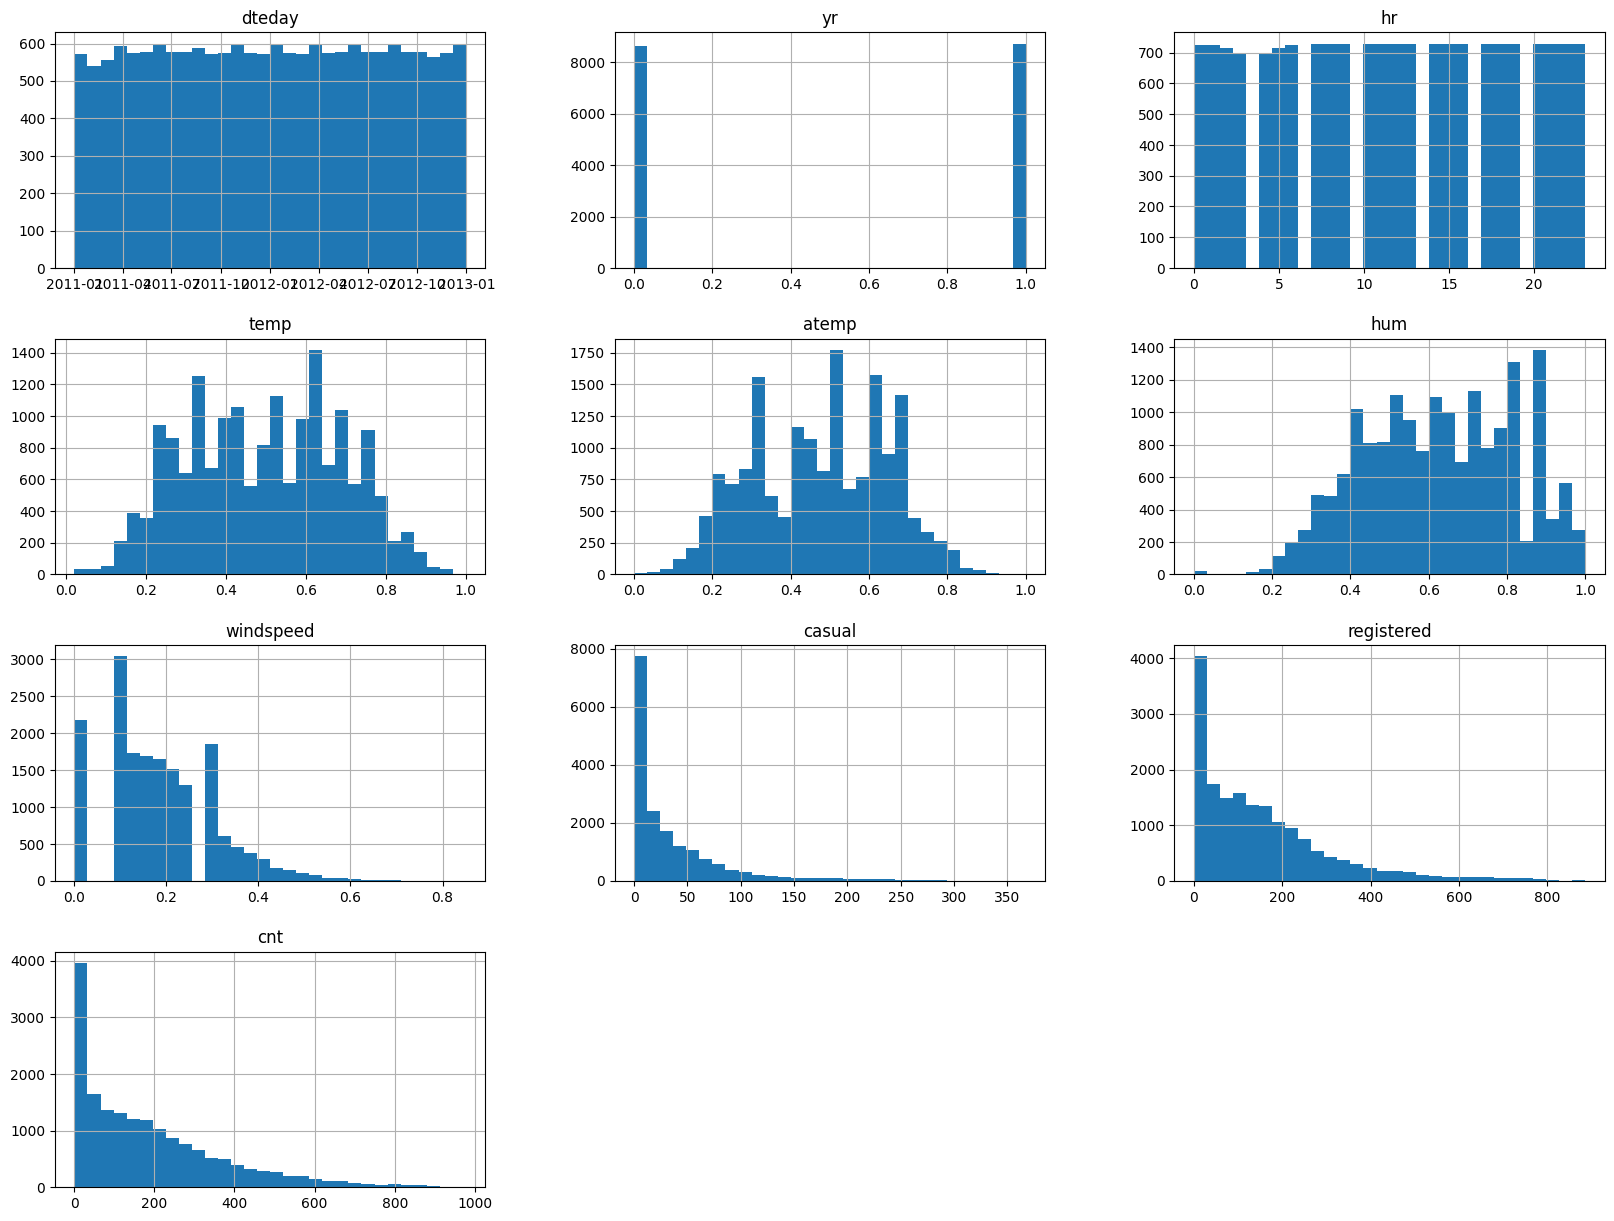

In [ ]:
hour.hist(bins=30, figsize=(20,15)) #Checking data distribution of numerical column

<ipython-input-290-7dfa9df84271>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hour.corr(), cmap='RdPu', annot = True)


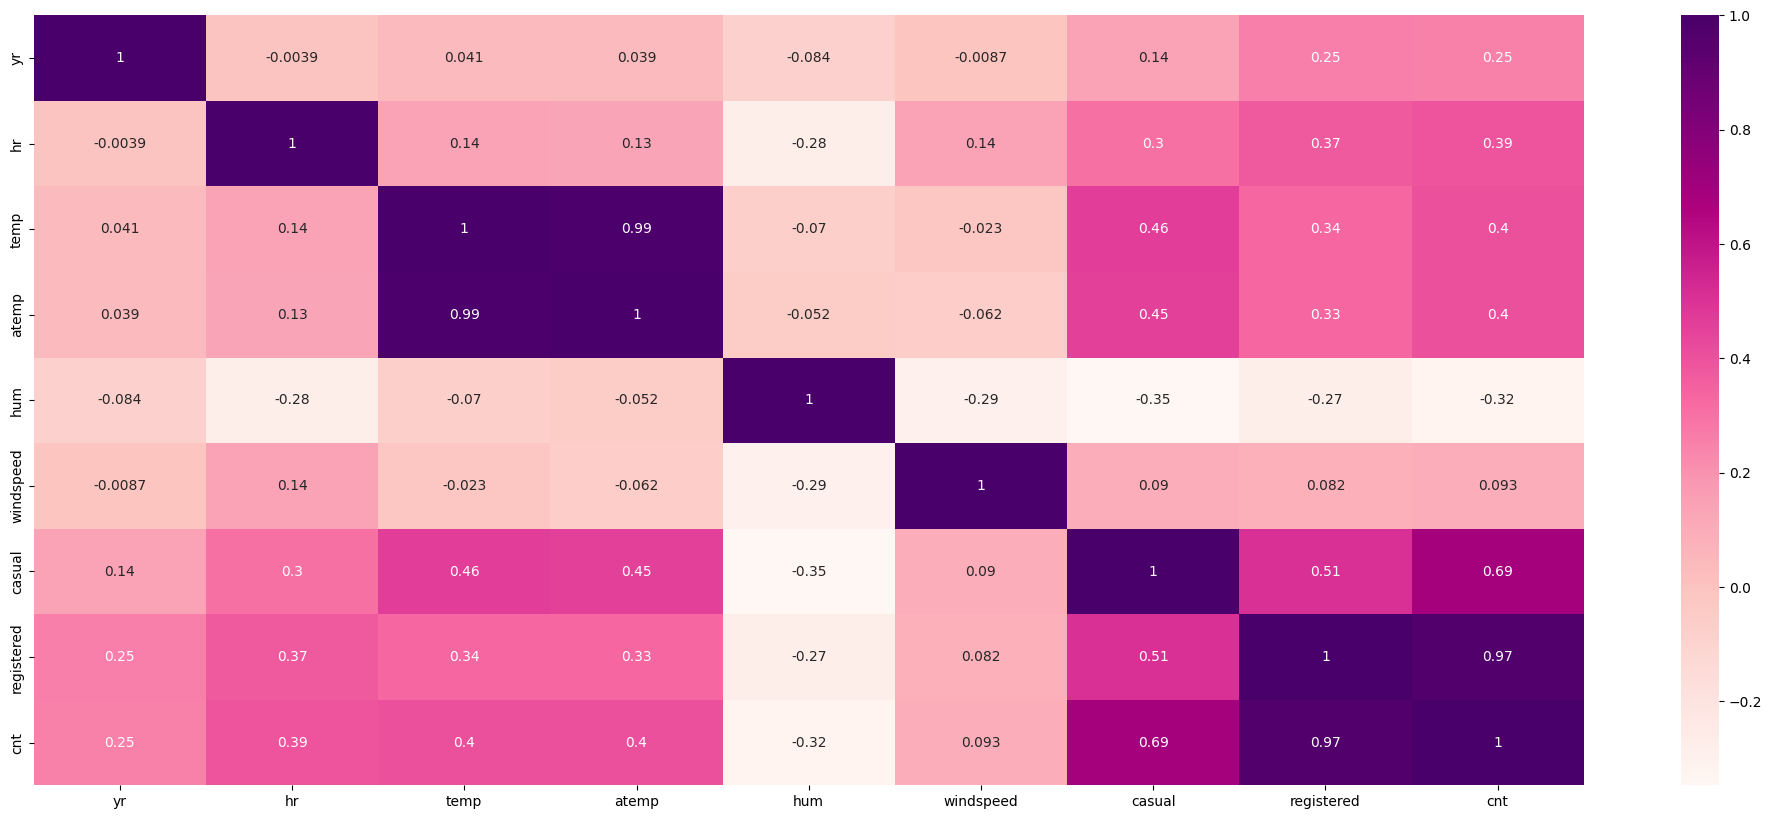

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(25,10))
sns.heatmap(hour.corr(), cmap='RdPu', annot = True)
plt.show( )

# Condition and Weather

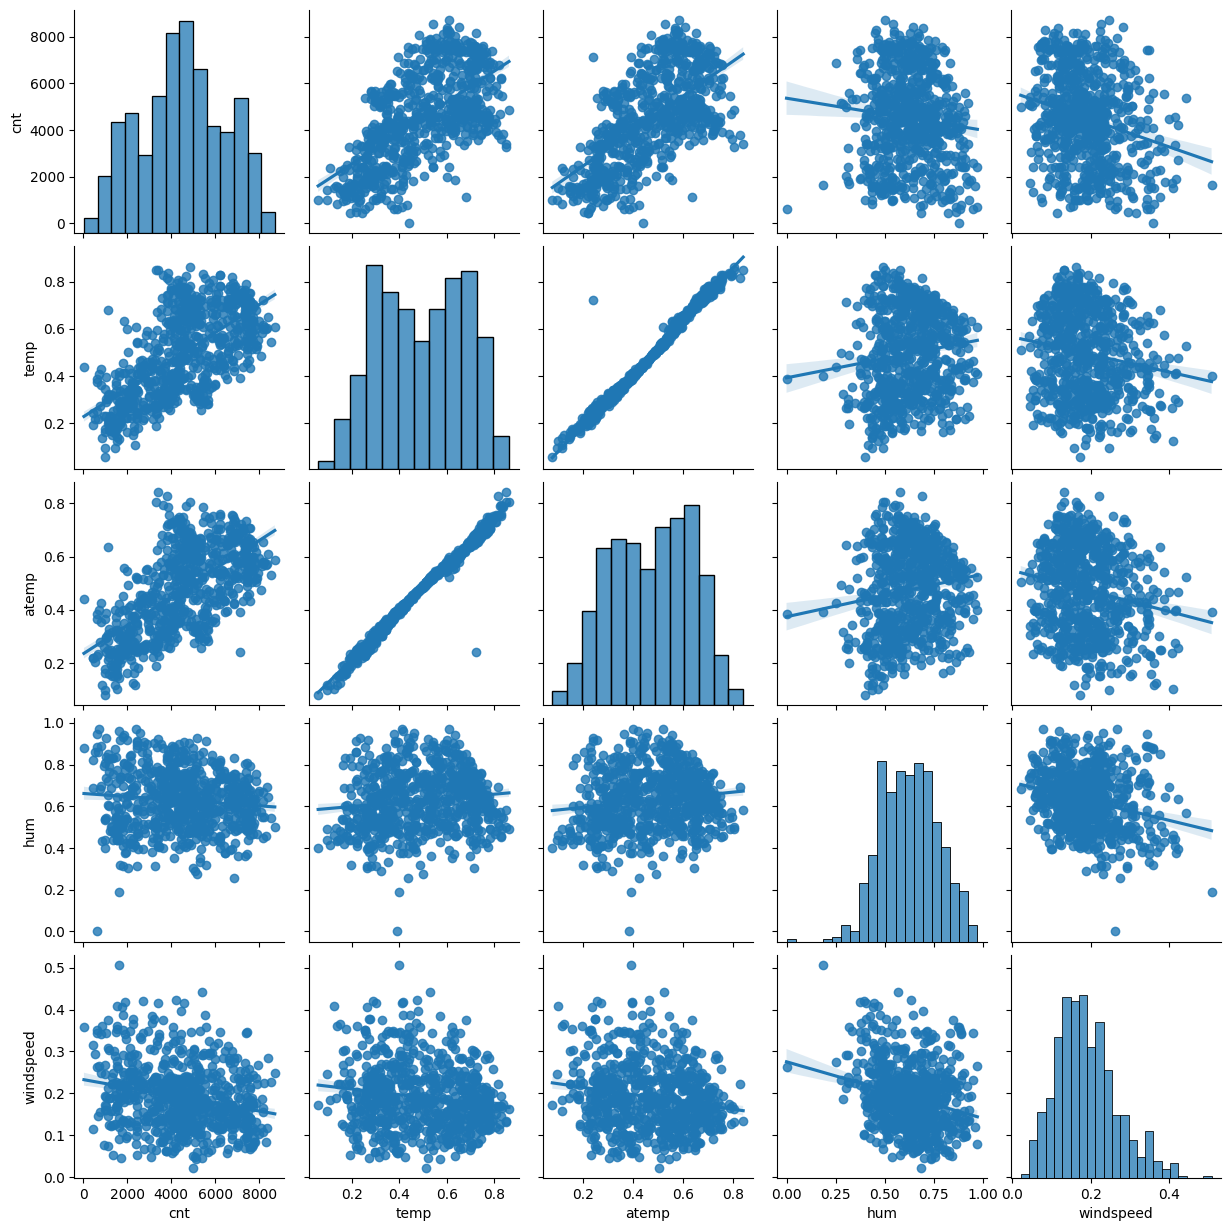

In [ ]:
#Checking numerical variable correlation in graph
num_variable = ['cnt','temp', 'atemp', 'hum', 'windspeed']
sns.pairplot (data=day, vars=num_variable, kind='reg')
plt.show()

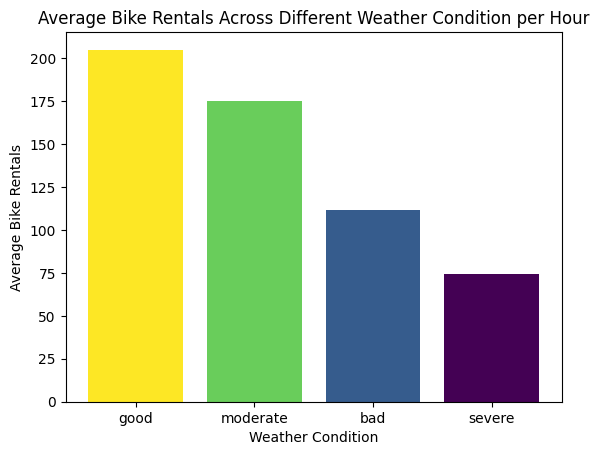

In [ ]:
# Weather Conditions vs. Total Rental Bikes per Hour

weather_data = hour.groupby('weathersit')['cnt'].mean().reset_index()
weather_data['norm_cnt'] = (weather_data['cnt'] - weather_data['cnt'].min()) / (weather_data['cnt'].max() - weather_data['cnt'].min())

cmap = plt.get_cmap('viridis')
for i, row in weather_data.iterrows():
    plt.bar(row['weathersit'], row['cnt'], color=cmap(row['norm_cnt']))

plt.title('Average Bike Rentals Across Different Weather Condition per Hour')
plt.xlabel('Weather Condition')
plt.ylabel('Average Bike Rentals')
plt.xticks(weather_data['weathersit'])
plt.show()

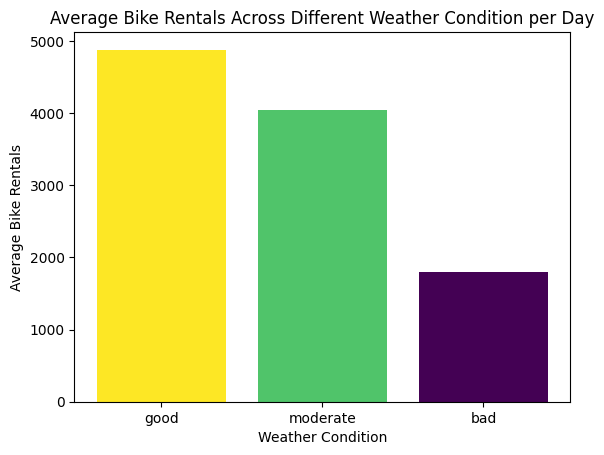

In [ ]:
# Weather Conditions vs. Total Rental Bikes per Day

weather_data = day.groupby('weathersit')['cnt'].mean().reset_index()
weather_data['norm_cnt'] = (weather_data['cnt'] - weather_data['cnt'].min()) / (weather_data['cnt'].max() - weather_data['cnt'].min())

cmap = plt.get_cmap('viridis')
for i, row in weather_data.iterrows():
    plt.bar(row['weathersit'], row['cnt'], color=cmap(row['norm_cnt']))

plt.title('Average Bike Rentals Across Different Weather Condition per Day')
plt.xlabel('Weather Condition')
plt.ylabel('Average Bike Rentals')
plt.xticks(weather_data['weathersit'])
plt.show()

In [344]:
flteredHour_df = hour_df[hour_df['weathersit'] == 4]
flteredDay_df = day_df[day_df['weathersit'] == 4]
# Display the filtered DataFrame
print(f"Day:\n{flteredDay_df}\n\nHour:\n{flteredHour_df}")

Day:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

Hour:
      instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
585       586  2011-01-26       1   0     1  16        0        3           1   
8854     8855  2012-01-09       1   1     1  18        0        1           1   
9123     9124  2012-01-21       1   1     1   1        0        6           0   

      weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
585            4  0.22  0.1970  0.93     0.3284       1          35   36  
8854           4  0.20  0.2273  0.86     0.0896       6         158  164  
9123           4  0.14  0.1364  0.86     0.1940       1          22   23  


**POINT**


---



From the graphs shown above:
* There is no outlier present in temp,  atemp, hum, and windspeed variable
* The temp and atemp feature are highly correlated
* There is no severe (4) weathersit condition occured in day dataframe
* Severe weather conditions only occurred in spring:1 time in 2011, and 2 times in 2012



# Weekend weekday

In [ ]:
# Create a new column 'day_type' to categorize days as 'weekday' or 'weekend'
day['day_type'] = day_df['weekday'].apply(lambda x: 'weekday' if (x >=1 and x<6) else 'weekend')

# Calculate average rentals by day type
average_rentals = day.groupby('day_type')['cnt'].mean()
print(average_rentals)

day_type
weekday    4550.566219
weekend    4389.685714
Name: cnt, dtype: float64


In [ ]:
from scipy.stats import ttest_ind

weekday_rentals = day[day['day_type'] == 'weekday']['cnt']
weekend_rentals = day[day['day_type'] == 'weekend']['cnt']

# Perform t-test for weekday and weekend group
t_stat, p_value = ttest_ind(weekday_rentals, weekend_rentals)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.5f}")

T-statistic: 1.02
P-value: 0.30995


**POINT**


---



From the T test above it shows that there is no statistically significant difference in the average count of total rental bikes between weekdays and weekends. The p-value of 0.30995 is greater than the commonly used threshold of 0.05, indicating that the observed difference in rental counts between weekdays and weekends could have occurred by chance alone. Thus, the difference in the number of bike rentals on weekdays and weekends is not large enough to be considered statistically significant based on the data analyzed.

## Visualization & Explanatory Analysis

### Pertanyaan 1: How does the trend of bike rentals change over time?

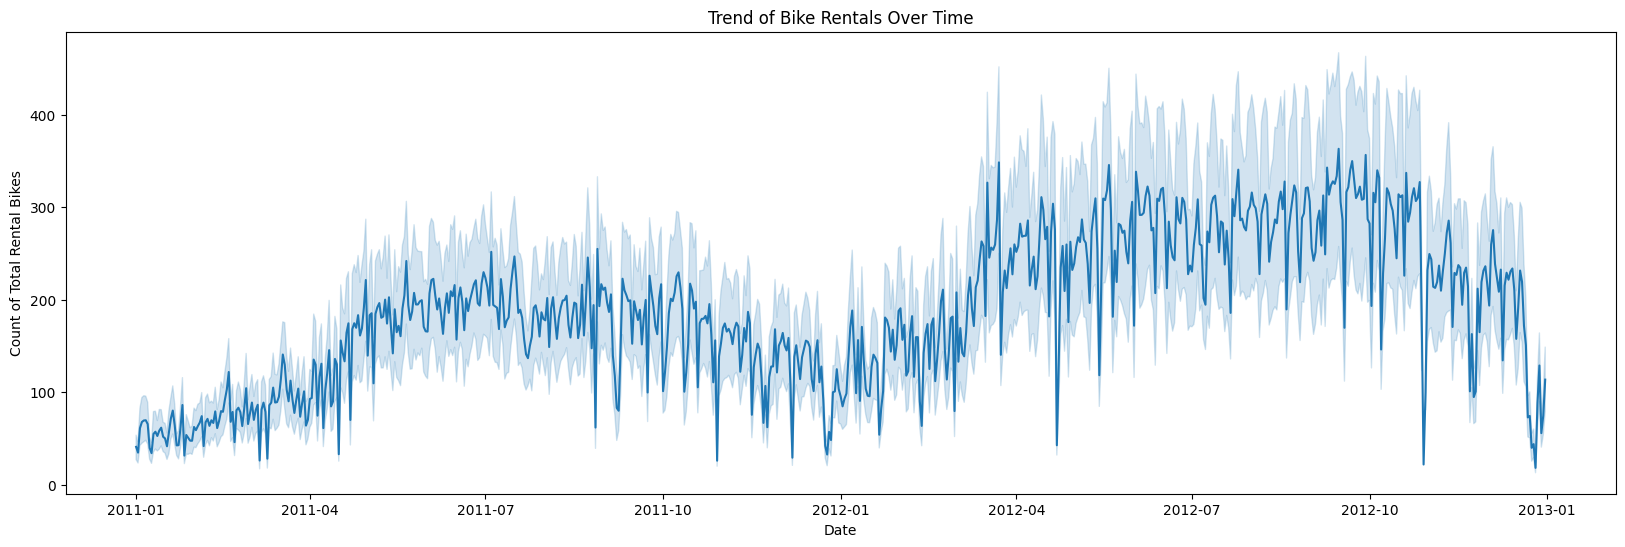

In [ ]:
# Plotting the trend of bike rentals over time
plt.figure(figsize=(20, 6))
sns.lineplot(x='dteday', y='cnt', data=hour)
plt.title('Trend of Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Total Rental Bikes')
plt.show()

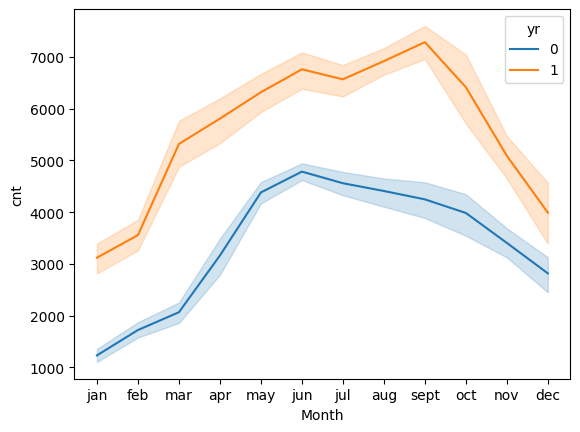

In [ ]:
# Line graph for the count each month for year 2011 and 2012
sns.lineplot (x = "mnth", y = "cnt", data=day, hue = "yr")
plt.xlabel('Month')
plt.show( )

**POINT**


*   The data shows an upward trend of bike rental from 2011 to 2012
*  There is consistent demand for bicycles throughout the year, with peaks between May and October in 2011 and 2012. This indicates a seasonal element to demand.
* There are also fluctuations in the count of rental bikes within each season. This could be due to factors such as short-term weather variations or holidays.


In [342]:
# function to create barplot related to categorical columns
def plot_bar_graphs(column) :
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='cnt', data=hour, ci=None)
    plt.title(f'Bar Plot of Bike Rental of {column}')
    plt.subplot(1, 2, 2)
    plt.title(f'Bar Plot of Bike Rental of {column} in 2011 and 2012')
    sns.barplot(x=column, y='cnt', data=day, hue='yr', palette='Set3', ci=None)
    plt.legend (title='yr', labels=['2011', '2012'])
    plt.tight_layout ()
    plt.show()


<ipython-input-342-8b202adb10c7>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='cnt', data=hour, ci=None)
<ipython-input-342-8b202adb10c7>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='cnt', data=day, hue='yr', palette='Set3', ci=None)


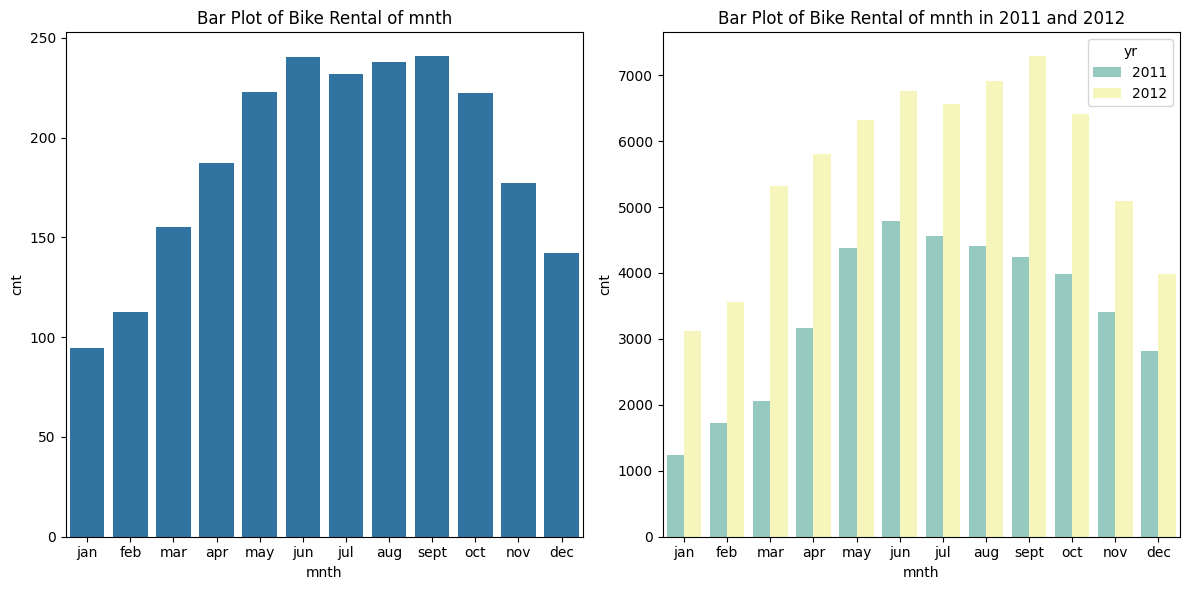

In [343]:
plot_bar_graphs('mnth')

<ipython-input-336-d4cad30e18df>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='cnt', data=day, hue='yr', palette='Set3', ci=None)


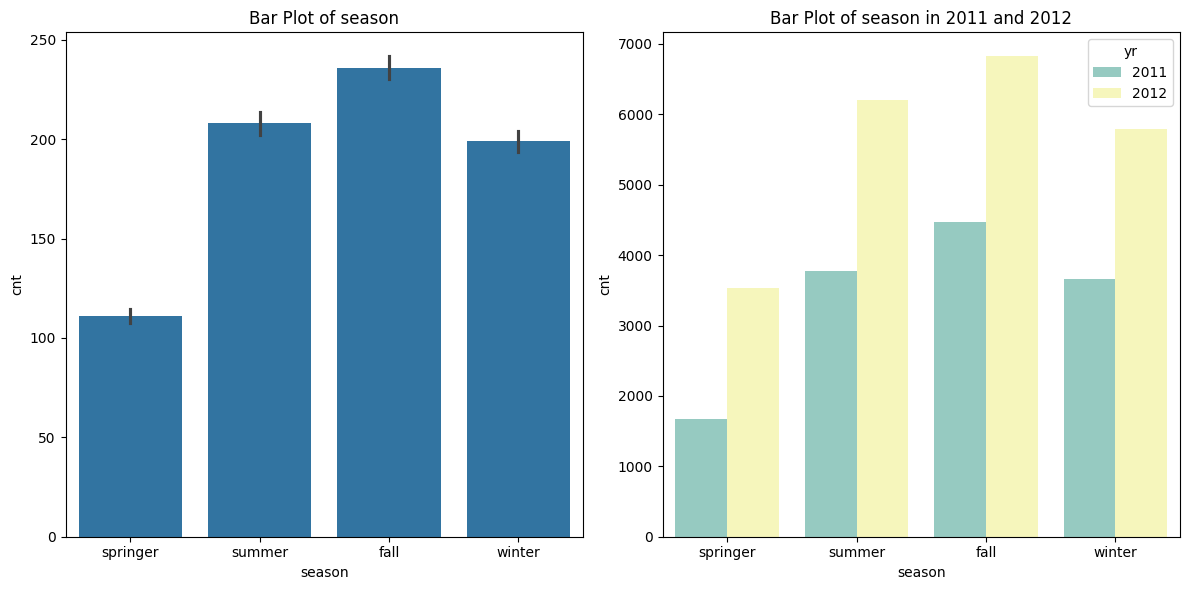

In [338]:
plot_bar_graphs('season')

**POINT**


---



The graphs above appears to show a seasonal trend in bike rentals, with higher counts in spring (April-May) and fall (September-October) and lower counts in summer (June-August) and winter (November-March). This suggests that people are more likely to use bikes for rental during milder temperatures, potentially due to more comfortable riding conditions.

### Pertanyaan 2: How does weather condition influence bike rentals in Q1 of 2011?

<ipython-input-315-84fd6c347f28>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='dteday', y='cnt', data=q1_2011_data, hue='weathersit', style='weathersit',


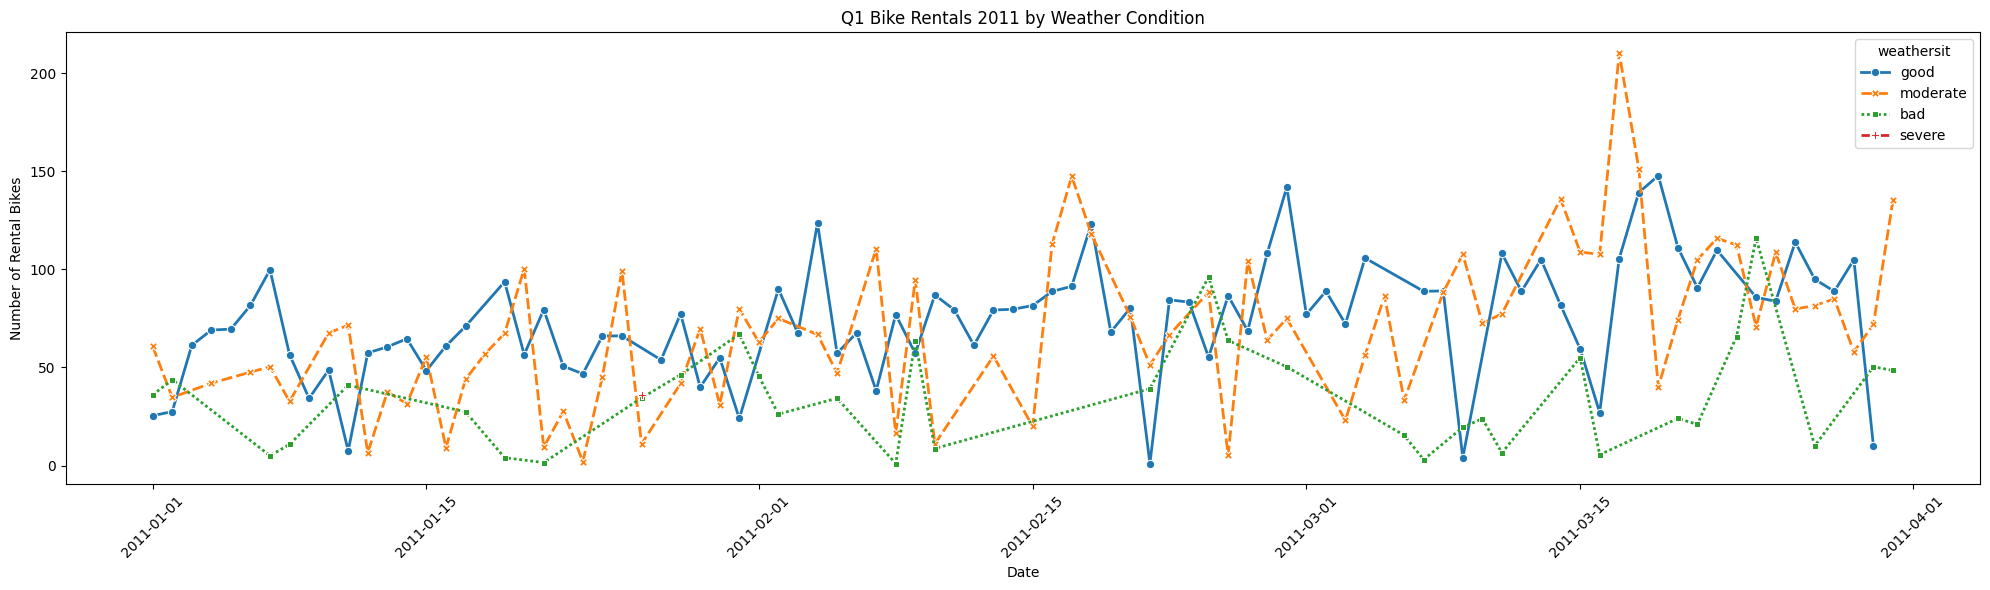

In [315]:
q1_2011_data = hour[(hour['yr'] == 0) & (hour_df['mnth'] <= 3)]

plt.figure(figsize=(20, 6))
sns.lineplot(x='dteday', y='cnt', data=q1_2011_data, hue='weathersit', style='weathersit',
             linewidth=2, markers=True, ci=None, err_kws={'zorder': 0}, legend='full')

plt.title('Q1 Bike Rentals 2011 by Weather Condition')
plt.xlabel('Date')
plt.ylabel('Number of Rental Bikes')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

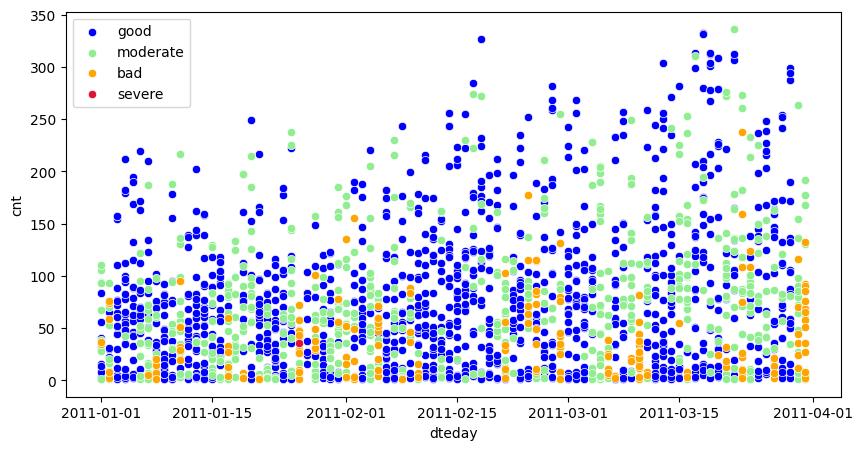

In [328]:
q1_2011_data = hour[(hour['yr'] == 0) & (hour_df['mnth'] <= 3)]
q1_good = q1_2011_data[(q1_2011_data['weathersit']=='good')]
q1_moderate = q1_2011_data[(q1_2011_data['weathersit']=='moderate')]
q1_bad = q1_2011_data[(q1_2011_data['weathersit']=='bad')]
q1_severe = q1_2011_data[(q1_2011_data['weathersit']=='severe')]

plt.figure(figsize=(10, 5))
sns.scatterplot(data=q1_good, x="dteday", y="cnt", facecolor="blue", label="good")
sns.scatterplot(data=q1_moderate, x="dteday", y="cnt", facecolor="lightgreen", label="moderate")
sns.scatterplot(data=q1_bad, x="dteday", y="cnt", facecolor="orange", label="bad")
sns.scatterplot(data=q1_severe, x="dteday", y="cnt", facecolor="crimson", label="severe")
plt.legend()
plt.show()

In [ ]:
weather_stats = q1_2011_data.groupby('weathersit')['cnt'].describe()
print(weather_stats)

             count       mean        std   min   25%   50%    75%    max
weathersit                                                              
good        1241.0  78.043513  70.258541   1.0  22.0  62.0  112.0  332.0
moderate     627.0  73.341308  62.723657   1.0  21.5  63.0   99.0  336.0
bad          198.0  38.262626  38.857957   1.0   8.0  27.0   56.0  238.0
severe         1.0  36.000000        NaN  36.0  36.0  36.0   36.0   36.0


**POINT**


---



> Good Weather

In the first quarter of 2011, good weather days saw the highest average bike rentals, with riders enjoying an average of 78 rentals per day. The number of rentals varied moderately, ranging from as low as 22 to as high as 112 per day.

> Moderate Weather

Days with moderate weather conditions experienced slightly lower average rentals, averaging 73 rentals per day. Similar to good weather days, the number of rentals exhibited moderate variation, ranging between 21 and 99 per day.

> Bad Weather

When bad weather hit, bike rentals were significantly impacted. The average dropped to only 38 rentals per day. While there was some variation, with rentals ranging from 8 to 56 per day, the impact of bad weather was undeniable.

> Severe Weather

Severe weather events were rare during the first quarter, with only one observation recorded. This suggests that severe weather had minimal impact on overall bike rentals during this period.



Overall, the analysis effectively demonstrates a clear relationship between weather and bike rentals. Good and moderate weather conditions encourage cycling, while bad weather significantly discourages it. The limited data on severe weather prevents a more detailed analysis of its impact.

### Pertanyaan 3: How the workday influence the bike rental in week?





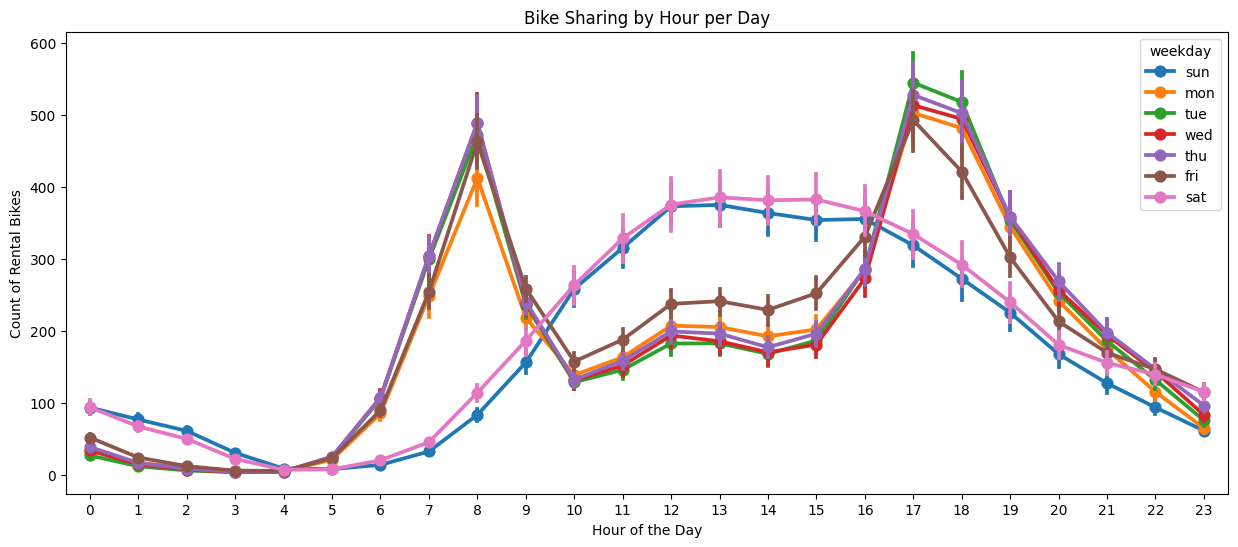

In [332]:

plt.figure(figsize=(15, 6))
sns.pointplot(x="hr", y="cnt", hue="weekday", data=hour)

plt.title('Bike Sharing by Hour per Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Rental Bikes')
plt.show()


<ipython-input-336-d4cad30e18df>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='cnt', data=day, hue='yr', palette='Set3', ci=None)


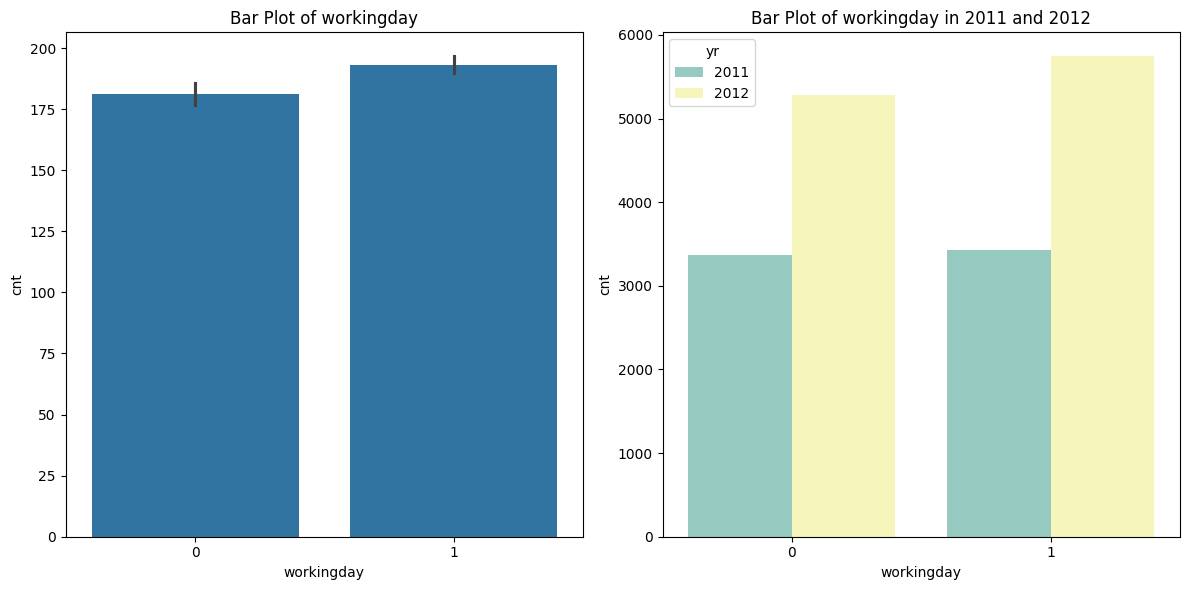

In [339]:
plot_bar_graphs('workingday')



---


Based on the graphs above:


*   The plot shows that the average number of bike rentals tends to be higher on weekdays (working day) compared to weekends. This indicates that there is a significant difference in the total number of bike rentals between weekdays and weekends.
*   Several factors that might influence this difference include the need for commuting, availability of time, and individual preferences for biking on weekdays.

## Conclusion

* The seasonal trend of peak bike usage is consistent, with peak demand in spring and fall, and dips in summer and winter due to milder temperatures.
* October is identified as the month with the highest demand, requiring further investigation to understand underlying factors like weather patterns or local events.
* The analysis reveals that in first quarter of 2011, the bike rentals counts are generally higher in good and moderate weather conditions, with a moderate spread, providing valuable data for inventory management and promotional activities.
* The study shows a consistent pattern of higher bike rentals on weekdays compared to weekends, suggesting a potential link between work commutes and increased bike usage.




In [ ]:
day.to_csv("day_data.csv", index=False)
hour.to_csv("hour_data.csv", index=False)